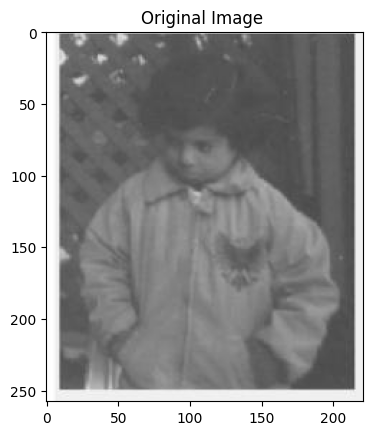

In [1]:
#cs20b1088
#G.sachin sai reddy
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

def histogram_equalization(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
    cumFrequecy = hist.cumsum()
    cumFrequecy_normalization = cumFrequecy / cumFrequecy.max()
    cumFrequecy_equalization = np.round(cumFrequecy_normalization * 255)
    img_equalized = cumFrequecy_equalization[img]
    # print('hello')
    print(img_equalized)
# Convert the data type of the image to uint8
    img_equalized = np.uint8(img_equalized)
    return img_equalized
    

img1 = cv2.imread('pout-dark.jpg')
img2 = cv2.imread('pout-bright.jpg')
plt.imshow(img1)
plt.title("Original Image ")
plt.show()





Question 1

[[[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [250. 250. 250.]
  ...
  [244. 244. 244.]
  [244. 244. 244.]
  [244. 244. 244.]]]


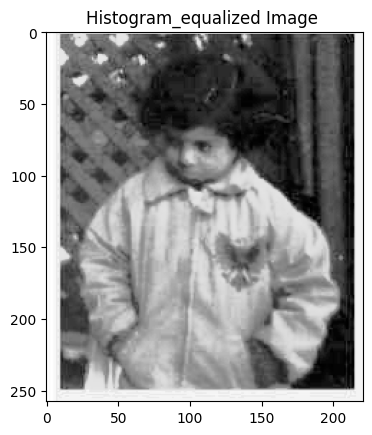

In [2]:
hist_img = histogram_equalization(img1)
plt.imshow(hist_img)
plt.title("Histogram_equalized Image ")
plt.show()


Question 2

In [3]:
def histogram_matching(source, reference):
    source_hist, _ = np.histogram(source.flatten(), 256, [0, 256])
    reference_hist, _ = np.histogram(reference.flatten(), 256, [0, 256])
    source_cdf = source_hist.cumsum()
    reference_cdf = reference_hist.cumsum()
# Normalizing the cdf
    source_cdf_normalized = source_cdf / source_cdf.max()
    reference_cdf_normalized = reference_cdf / reference_cdf.max()
    mapping_function = np.interp(source_cdf_normalized,
    reference_cdf_normalized, range(256))
# Appyling map function
    matched = np.round(np.interp(source.flatten(), range(256),
    mapping_function))
    matched_img = matched.reshape(source.shape)
    matched_img = np.uint8(matched_img)
    return matched_img


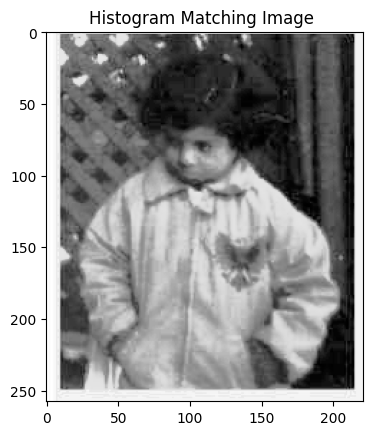

In [4]:
hist_mat_img = histogram_matching(img1,img2)
plt.imshow(hist_img)
plt.title("Histogram Matching Image ")
plt.show()